# Least square approximation

# Introduction to Least Squares and the Normal Equation

The **Least Squares** method is a fundamental approach in regression analysis used to find the best-fitting curve or line to a given set of data points by minimizing the sum of the squares of the vertical deviations (residuals) from each data point to the curve. This technique is widely used in data fitting, statistics, and machine learning.

## The Least Squares Problem

Given a set of observed data points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, we aim to find a function $y = f(x)$ from a chosen family of functions that best approximates the data. The least squares method seeks the function $f$ that minimizes the sum of the squared differences between the observed values $y_i$ and the predicted values $f(x_i)$:

$$
\min_f \sum_{i=1}^n (y_i - f(x_i))^2
$$


The goal is to find $\beta$ that minimizes the sum of squared errors:

$$
\min_\beta \sum_{i=1}^n (y_i - f_\beta(x_i))^2
$$


## Derivation of the Normal Equation

To find the optimal $\beta$, we set the derivative of the loss function with respect to $\beta$ to zero:

$$
\frac{\partial}{\partial \beta} \sum_{i=1}^n (y_i - f_\beta(x_i))^2 = 0
$$


Expanding and differentiating, we get:

$$
-2X^T(y - X\beta) = 0
$$

Solving for $\beta$:

$$
X^T X \beta = X^T y
$$

This is known as the **normal equation**. The solution is:

$$
\beta = (X^T X)^{-1} X^T y
$$

The normal equation provides a closed-form solution for the coefficients that minimize the sum of squared residuals in linear regression.

## Examples: Least Squares Approximation with Sine and Cosine

Let's consider fitting a function of the form:

$$
y = a \sin(x) + b \cos(x)
$$

to a set of data points $(x_i, y_i)$ using the least squares method.

### Example Data

Suppose we have the following data:

| $x$ | $y$ |
|-----|-----|
| 0   | 1.0 |
| $\frac{\pi}{4}$ | 1.2 |
| $\frac{\pi}{2}$ | 0.9 |
| $\pi$ | -1.1 |
| $\frac{3\pi}{2}$ | -0.95 |

### Constructing the Design Matrix

For each $x_i$, the model predicts:

$$
y_i \approx a \sin(x_i) + b \cos(x_i)
$$

So, the design matrix $X$ and vector $y$ are:

$$
X = \begin{bmatrix}
\sin(x_1) & \cos(x_1) \\
\sin(x_2) & \cos(x_2) \\
\vdots & \vdots \\
\sin(x_n) & \cos(x_n)
\end{bmatrix}, \quad
y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

### Applying the Normal Equation

The least squares solution is:

$$
\begin{bmatrix}
a \\
b
\end{bmatrix}
= (X^T X)^{-1} X^T y
$$

### Interpretation

By solving this equation, we find the coefficients $a$ and $b$ that best fit the data in the least squares sense using sine and cosine as basis functions. This approach is commonly used in signal processing and time series analysis.

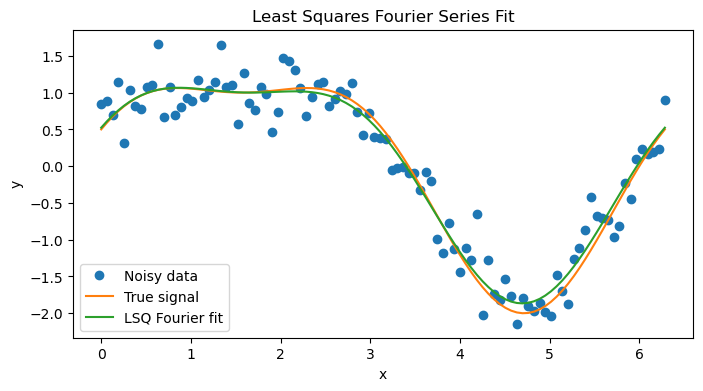

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: noisy periodic signal
x = np.linspace(0, 2 * np.pi, 100)
y_true = 1.5 * np.sin(x) + 0.5 * np.cos(2 * x)
noise = 0.3 * np.random.randn(len(x))
y = y_true + noise

# Construct design matrix for Fourier series up to order 2
X = np.column_stack([
    np.ones_like(x),           # constant term
    np.sin(x), np.cos(x),      # first harmonic
    np.sin(2 * x), np.cos(2 * x)  # second harmonic
])

# Least squares solution
coeffs, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

# Predicted values
y_fit = X @ coeffs

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o', label='Noisy data')
plt.plot(x, y_true, label='True signal')
plt.plot(x, y_fit, label='LSQ Fourier fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fourier Series Fit')
plt.show()

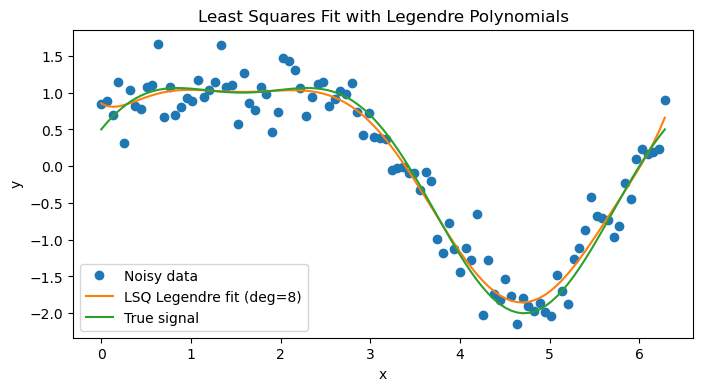

In [5]:
from numpy.polynomial.legendre import legvander

# Degree of Legendre polynomial fit
deg = 8

# Rescale x to [-1, 1] for Legendre polynomials
x_leg = 2 * (x - x.min()) / (x.max() - x.min()) - 1

# Construct Legendre Vandermonde matrix
X_leg = legvander(x_leg, deg)

# Least squares fit
coeffs_leg, _, _, _ = np.linalg.lstsq(X_leg, y, rcond=None)

# Predicted values
y_leg_fit = X_leg @ coeffs_leg

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o', label='Noisy data')
plt.plot(x, y_leg_fit, label='LSQ Legendre fit (deg={})'.format(deg))
plt.plot(x, y_true, label='True signal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit with Legendre Polynomials')
plt.show()

# Discrete
Table 4.1 from Turner et al. Driving at the specified speed, this shows the distance the car traveled after the driver was told to stop. 
 
| Speed (km/h) | Distance (m) |
|--------------|-------------|
| 40           | 17          |
| 55           | 31          |
| 70           | 46          |
| 90           | 65          |
| 100          | 87          |


In [6]:
# Data from the table
speed = np.array([40, 55, 70, 90, 100])
distance = np.array([17, 31, 46, 65, 87])

# Construct A matrix for second order polynomial: [1, speed, speed^2]
A = np.column_stack([np.ones_like(speed), speed, speed**2])
y_vec = distance

print("A matrix:\n", A)
print("y vector:\n", y_vec)

A matrix:
 [[    1    40  1600]
 [    1    55  3025]
 [    1    70  4900]
 [    1    90  8100]
 [    1   100 10000]]
y vector:
 [17 31 46 65 87]


In [7]:
# Manually solve the normal equation for LSQ: beta = (A^T A)^(-1) A^T y
ATA = A.T @ A
ATy = A.T @ y_vec
coeffs_poly_manual = np.linalg.inv(ATA) @ ATy
print("Manual LSQ polynomial coefficients:", coeffs_poly_manual)

Manual LSQ polynomial coefficients: [3.40125392 0.07016719 0.00738767]


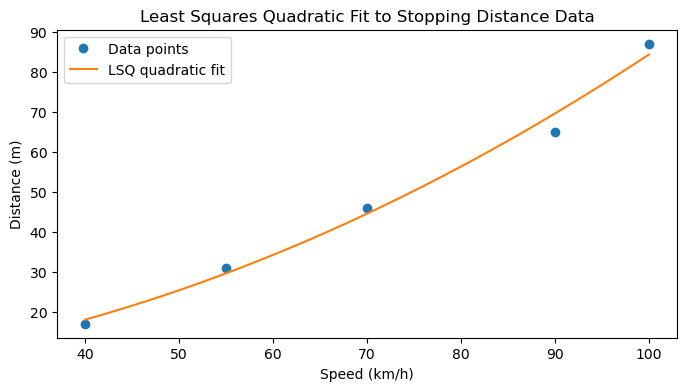

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(speed, distance, 'o', label='Data points')
speed_fit = np.linspace(speed.min(), speed.max(), 200)
A_fit = np.column_stack([np.ones_like(speed_fit), speed_fit, speed_fit**2])
distance_fit = A_fit @ coeffs_poly_manual
plt.plot(speed_fit, distance_fit, label='LSQ quadratic fit')
plt.xlabel('Speed (km/h)')
plt.ylabel('Distance (m)')
plt.title('Least Squares Quadratic Fit to Stopping Distance Data')
plt.legend()
plt.show()